In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
from folium import plugins
import folium
from folium.plugins import HeatMap
import geopandas as gpd
import json
from shapely.geometry import MultiPolygon

In [2]:
n = 10  # every 100th line = 1% of the lines
df18 = pd.read_csv("On-street_Car_Parking_Sensor_Data_-_2019.csv",skiprows=lambda i: i % n != 0 )
# df19 = pd.read_csv("On-street_Car_Parking_Sensor_Data_-_2018.csv",skiprows=lambda i: i % n != 0 )
senSensorData = pd.read_csv("On-street_Parking_Bay_Sensors.csv")  

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

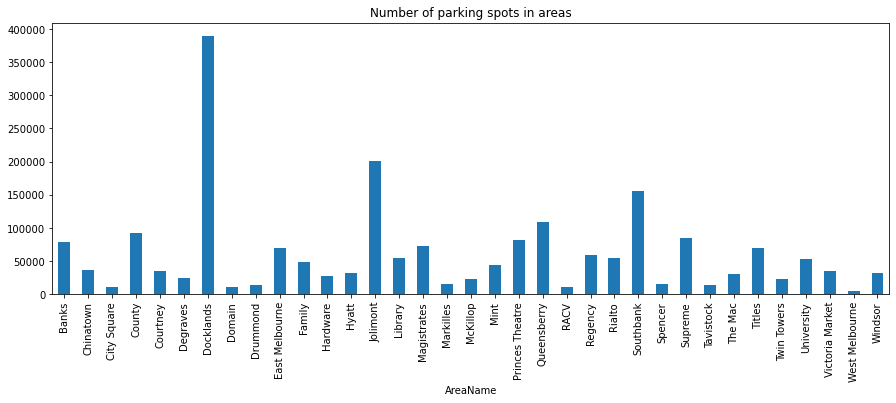

In [4]:
df18 = df18[df18['AreaName']!='All']
parkingsSpots = df18[['AreaName', 'DeviceId']].dropna()
spotsInArea =  parkingsSpots['DeviceId'].groupby(parkingsSpots['AreaName']).size()
figure(figsize=(15,5))
spotsInArea.plot(kind = 'bar', title = "Number of parking spots in areas",sharex='True', fig=figure)
plt.show()

#hourData = data[(data['Category'] == 'LARCENY/THEFT') &
#                (pd.to_datetime((data['Time']), format="%H:%M").dt.hour == 19) &
#                (data['Date'].dt.year == 2014) &
#                (data['Date'].dt.month < 6)].sort_values('Time')
#drugdata = data[(data['Category'] == 'DRUG/NARCOTIC') & (data['Date'].dt.year == 2016) & (data['Date'].dt.month >= 6) & (data['Date'].dt.month <=7)]

In [5]:
df18['ArrivalTime'] = pd.to_datetime(df18['ArrivalTime'], format="%m/%d/%Y %I:%M:%S %p")
df18['DepartureTime'] = pd.to_datetime(df18['DepartureTime'], format="%m/%d/%Y %I:%M:%S %p")

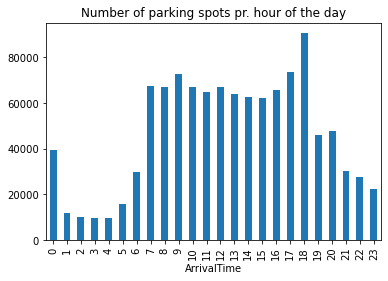

In [6]:
spotTakenDf = df18

crime = spotTakenDf[spotTakenDf['VehiclePresent'] == True].groupby(spotTakenDf['ArrivalTime'].dt.hour).size()
crime.plot(kind = 'bar', title = "Number of parking spots pr. hour of the day",sharex='True')
plt.show()

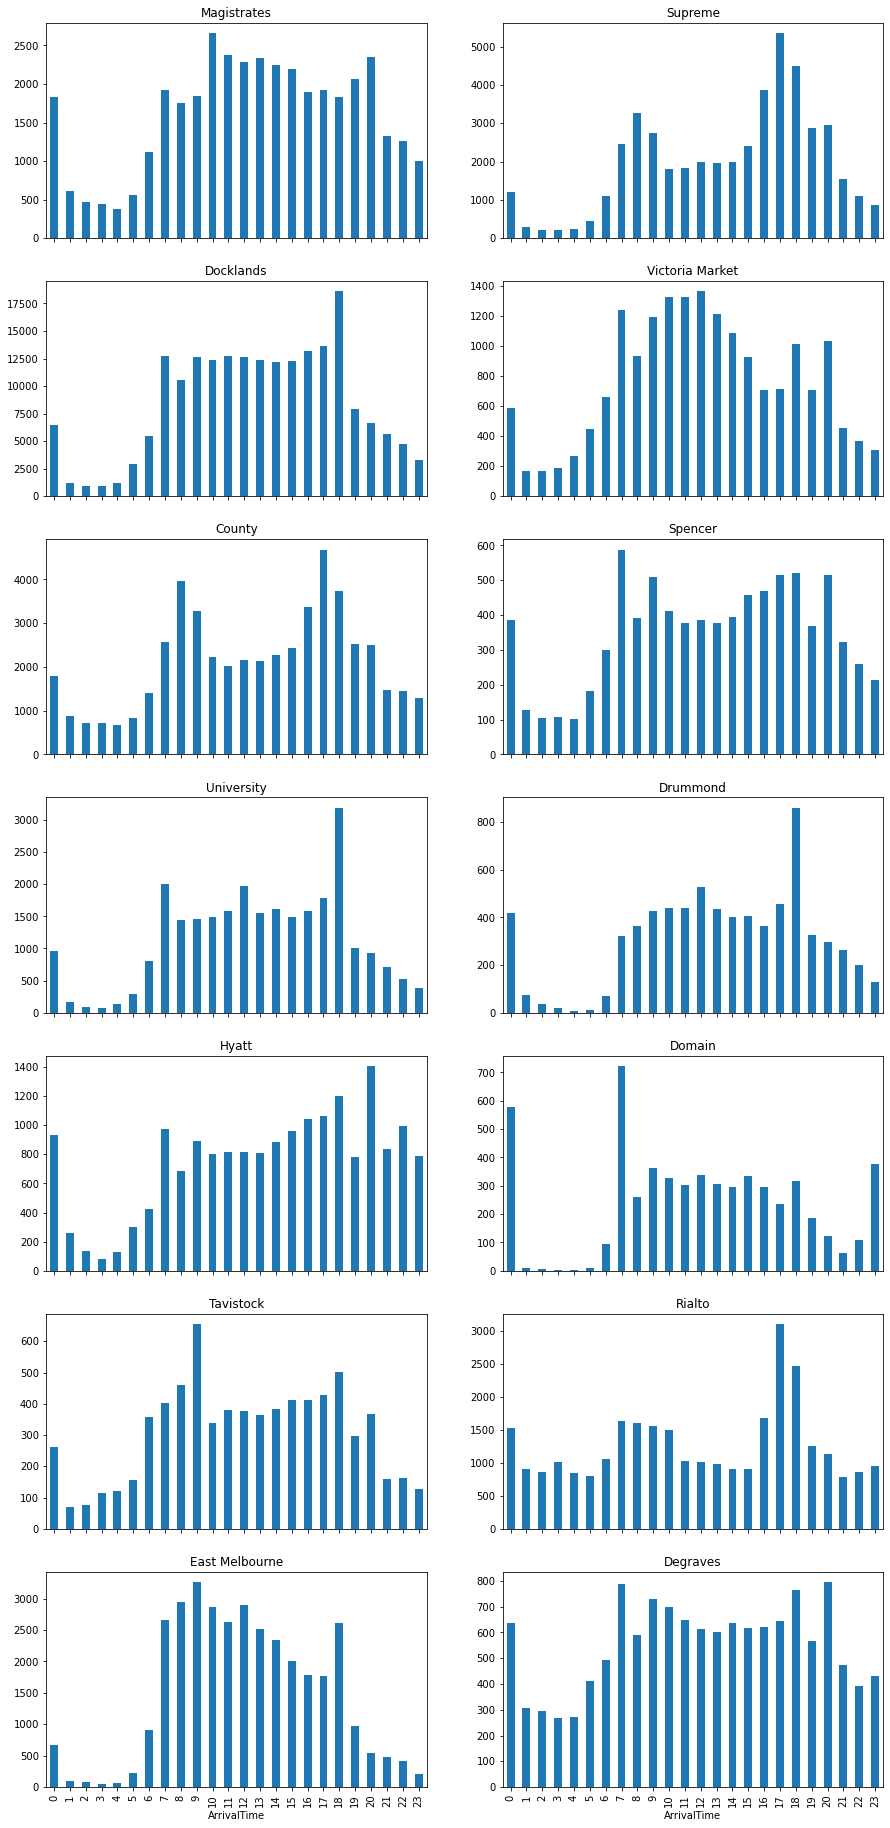

In [7]:
areas = set(['Library', 'Regency', 'Queensberry', 'The Mac', 'Princes Theatre', 'Courtney', 'Drummond', 'Hardware', 'Supreme', 'City Square', 'Domain', 'McKillop', 'Tavistock', 'Degraves', 'Markilles', 'Southbank', 'West Melbourne', 'Victoria Market', 'East Melbourne', 'Spencer', 'Jolimont', 'Docklands', 'Mint', 'Family', 'Twin Towers', 'Hyatt', 'Titles', 'Chinatown', 'County', 'Windsor', 'Magistrates', 'University', 'Rialto', 'Banks'])

a=7
b=2
c=1

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig = plt.figure(figsize=(15,5))

for x in areas:
    plt.subplot(a,b,c)
    areasub = spotTakenDf[(spotTakenDf['AreaName'] == x) & (spotTakenDf['VehiclePresent'] == True)].groupby(spotTakenDf['ArrivalTime'].dt.hour).size()
    areasub.plot(kind='bar', title = x, sharex = 'True')
    
    c = c + 1
    if c > 14:
        break
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=5, wspace=0.2, hspace=0.2)
plt.show()

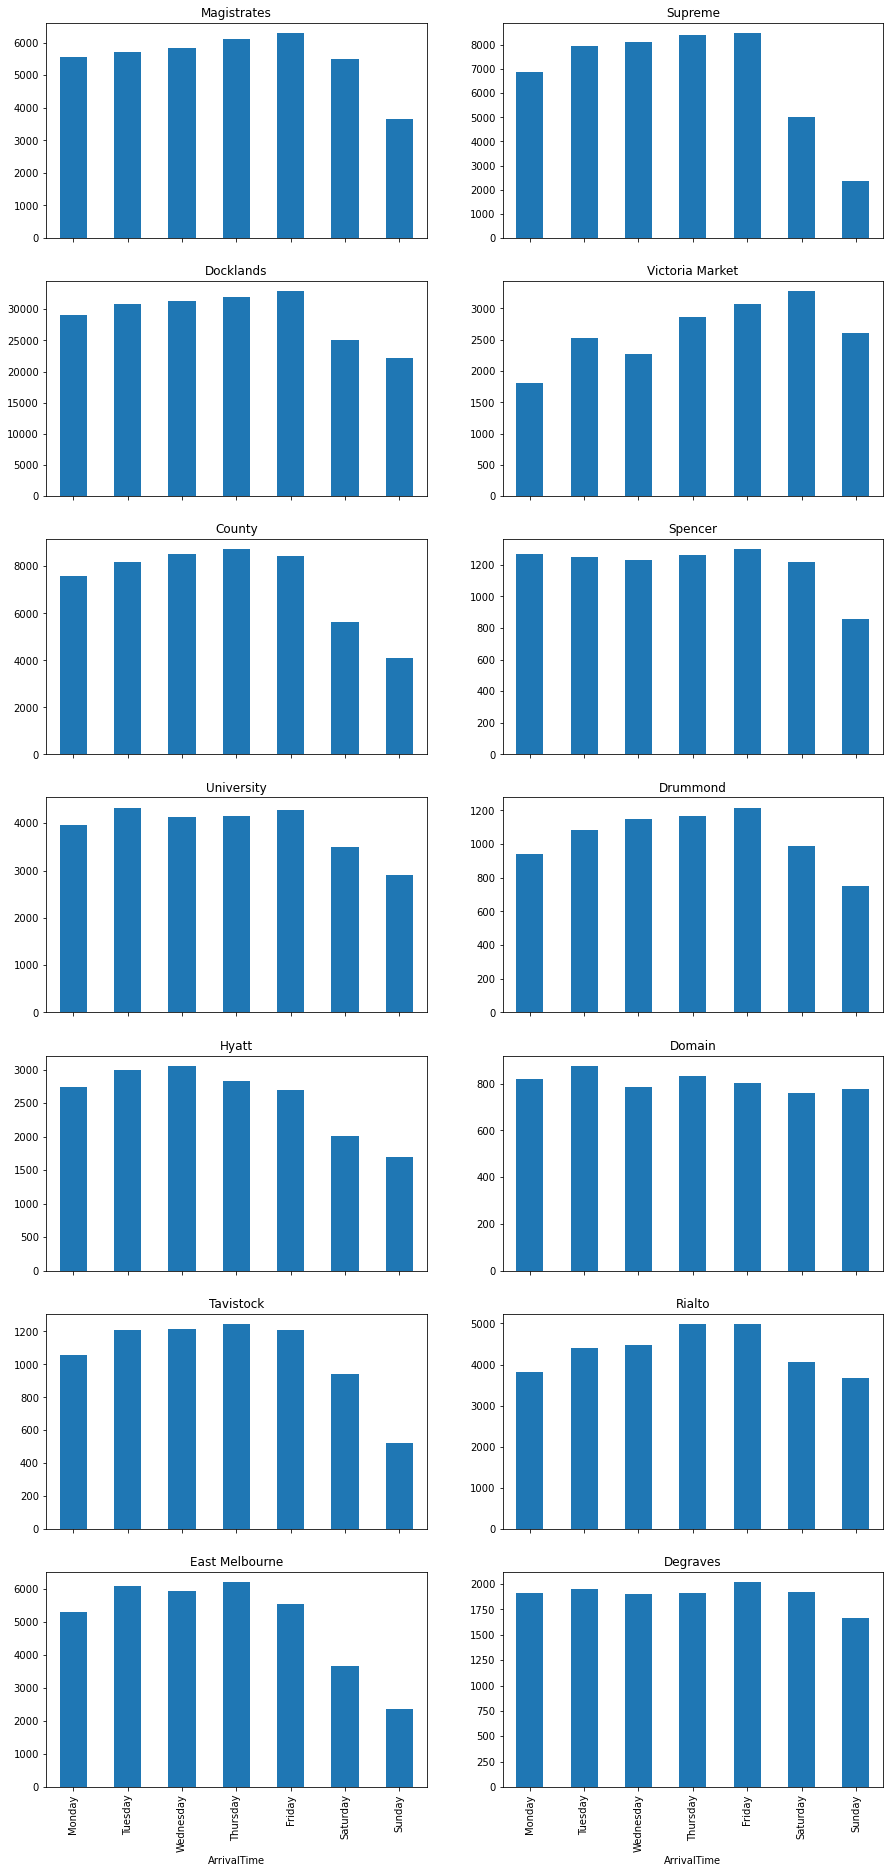

In [8]:
areas = set(['Library', 'Regency', 'Queensberry', 'The Mac', 'Princes Theatre', 'Courtney', 'Drummond', 'Hardware', 'Supreme', 'City Square', 'Domain', 'McKillop', 'Tavistock', 'Degraves', 'Markilles', 'Southbank', 'West Melbourne', 'Victoria Market', 'East Melbourne', 'Spencer', 'Jolimont', 'Docklands', 'Mint', 'Family', 'Twin Towers', 'Hyatt', 'Titles', 'Chinatown', 'County', 'Windsor', 'Magistrates', 'University', 'Rialto', 'Banks'])

a=7
b=2
c=1

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig = plt.figure(figsize=(15,5))

for x in areas:
    plt.subplot(a,b,c)
    areasub = spotTakenDf[(spotTakenDf['AreaName'] == x) & (spotTakenDf['VehiclePresent'] == True)].groupby(spotTakenDf['ArrivalTime'].dt.day_name()).size().reindex(weekdays)
    areasub.plot(kind='bar', title = x, sharex = 'True')
    
    c = c + 1
    if c > 14:
        break
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=5, wspace=0.2, hspace=0.2)
plt.show()

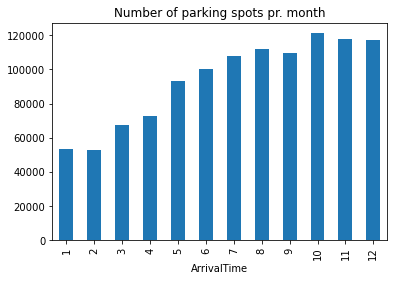

In [9]:
spotTakenDf = df18

crime = spotTakenDf[spotTakenDf['VehiclePresent'] == True].groupby(spotTakenDf['ArrivalTime'].dt.month).size()
crime.plot(kind = 'bar', title = "Number of parking spots pr. month",sharex='True')
plt.show()

In [10]:
spotTakenDf['count'] = 0
spotTakenDf['ArrivalHour'] = spotTakenDf['ArrivalTime'].dt.hour
spotsInArea =  spotTakenDf[spotTakenDf['VehiclePresent'] == False].groupby(['AreaName', 'ArrivalHour'])['count'].size()
spotsInArea = spotsInArea.reset_index()
spotTakenDf['total'] = 0
spotsInAreaTotal =  spotTakenDf[spotTakenDf['VehiclePresent'] == False].groupby(['AreaName'])['total'].size()
spotsInAreaTotal = spotsInAreaTotal.reset_index()
merged = pd.merge(spotsInAreaTotal, spotsInArea, on='AreaName')
merged['mean'] = merged['total'] / merged['count']
merged = merged[merged['AreaName'] != 'All']
merged['mean'] = merged['mean'].apply(np.ceil)
merged['mean'] = merged['mean'].astype(int)

In [11]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import numpy as np
from bokeh.models import ColumnDataSource, FactorRange, Legend

In [12]:
areas = set(['Library', 'Regency', 'Queensberry', 'The Mac', 'Princes Theatre', 'Courtney', 'Drummond', 'Hardware', 'Supreme', 'City Square', 'Domain', 'McKillop', 'Tavistock', 'Degraves', 'Markilles', 'Southbank', 'West Melbourne', 'Victoria Market', 'East Melbourne', 'Spencer', 'Jolimont', 'Docklands', 'Mint', 'Family', 'Twin Towers', 'Hyatt', 'Titles', 'Chinatown', 'County', 'Windsor', 'Magistrates', 'University', 'Rialto', 'Banks'])

dailyHours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
df18['Hours'] = df18['ArrivalTime'].dt.hour
normalizedData = pd.DataFrame(dailyHours, columns = ['Hours'])
sample10 = df18.sample(100000)
sample1=sample10['DeviceId'].groupby(sample10['AreaName']).size()
sample1=sample1.reset_index()
sample=pd.merge(sample1, sample10, on='AreaName')
#sample['idCounts'] = np.where(sample['AreaName'] == c, True, False)
for c in areas:
    sample[sample['AreaName'] == c]
for x in areas:
    dailyHoursArray = []
    for i in range(0,24):
        dailyHoursArray.append(sample[(sample['AreaName'] == x) & (sample['ArrivalTime'].dt.hour == i) & (sample['VehiclePresent'] == True)].size/sample.loc[sample['AreaName']==x, 'DeviceId_x'].values[0])
    normalizedData[x] = dailyHoursArray

In [13]:
sourceData = ColumnDataSource(normalizedData)

In [14]:
hoursStrings=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
p = figure(x_range = FactorRange(factors=hoursStrings), x_axis_label = "hour of the day", width = 1500, height = 850, margin = 10)

In [15]:
colorCodes= ['#ff0000', '#ff5e00', '#ffd900', '#c8ff00', '#3cff00', '#00ffb7', '#00eaff', '#005eff', '#7300ff', '#d000ff', '#ff00f7', '#ff006f', '#828282', '#000000', '#ff0000', '#ff5e00', '#ffd900', '#c8ff00', '#3cff00', '#00ffb7', '#00eaff', '#005eff', '#7300ff', '#d000ff', '#ff00f7', '#ff006f', '#828282', '#000000', '#ff0000', '#ff5e00', '#ffd900', '#c8ff00', '#3cff00', '#00ffb7', '#00eaff']
barColumn = {}
items = []

for index, i in enumerate(areas):
    barColumn[i] = p.vbar(x="Hours", top = i, source = sourceData, muted_alpha= 0.05, muted=True, fill_color=colorCodes[index], width=(0.90))
    items.append((i,[barColumn[i]]))

In [16]:
geoFile = open("On-street Parking Bays.geojson")
geoData = json.load(geoFile)
dfGeo = pd.json_normalize(geoData['features'])
dfGeo = dfGeo.dropna()
senSensorData.rename(columns = {"st_marker_id": "StreetMarker"}, 
          inplace = True)

In [17]:
resultdf = pd.merge(df18, senSensorData, on='StreetMarker')

In [18]:
resultdfsample = resultdf.sample(10000)
heatsus = [[[row['lat'],row['lon']] for index, row in resultdfsample[resultdfsample['ArrivalTime'].dt.hour == i].iterrows()] for i in range(1,24)]

In [19]:
SFmap = folium.Map([-37.810935, 144.946457], zoom_start=13)
hm = plugins.HeatMapWithTime(heatsus,auto_play=True, max_opacity = 0.8)
hm.add_to(SFmap)
SFmap

In [20]:
legend = Legend(items = items, location=(0,-30))
p.add_layout(legend, 'left')
p.legend.click_policy="mute"
show(p)